In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

3

In [8]:
num_versicolor = len(df[df['species'] == 'Iris-versicolor'])
num_virginica = len(df[df['species'] == 'Iris-virginica'])
num_setosa = len(df[df['species'] == 'Iris-setosa'])

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


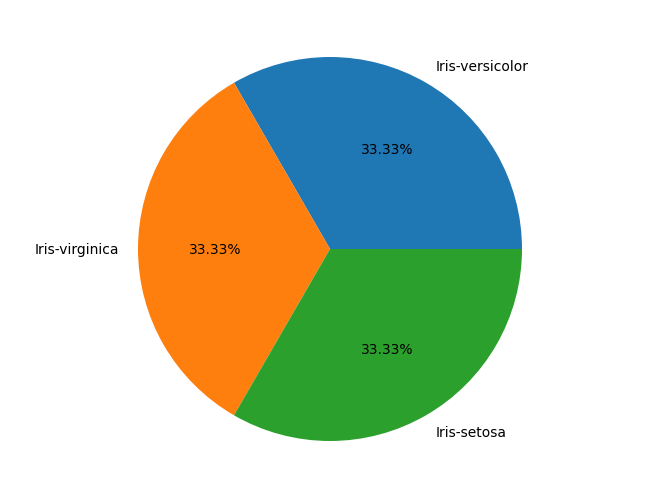

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l= ["Iris-versicolor", "Iris-virginica", "Iris-setosa"]
s = [num_versicolor, num_virginica, num_setosa]
ax.pie(s, labels=l, autopct='%1.2f%%')
plt.show()

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


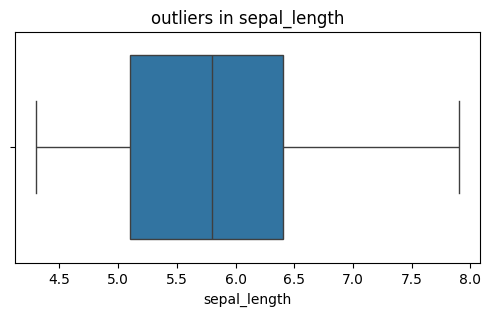

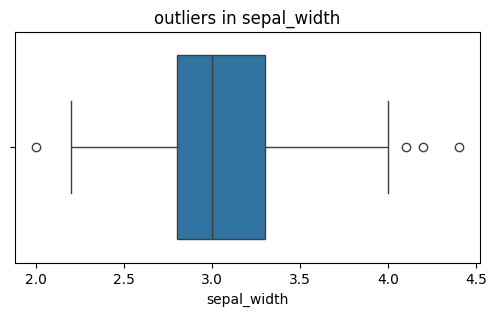

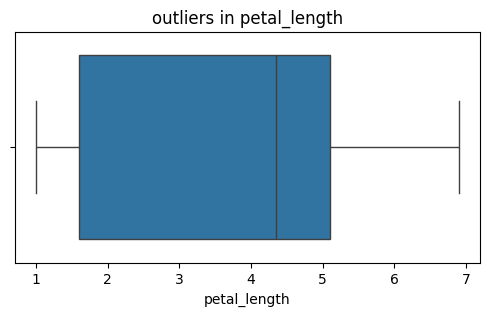

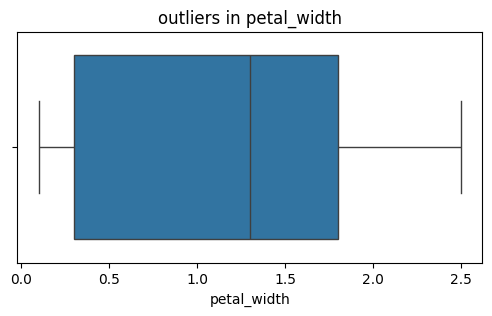

In [14]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for col in numeric_cols :
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'outliers in {col}')
    plt.show()


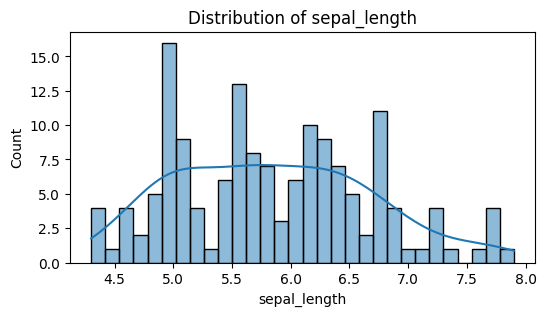

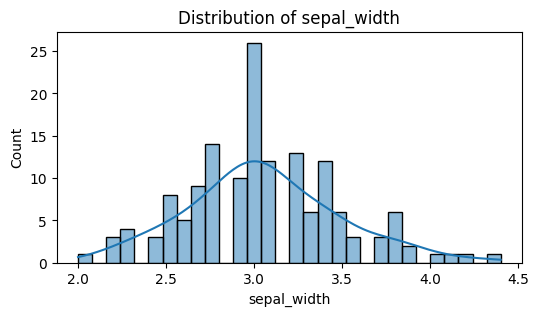

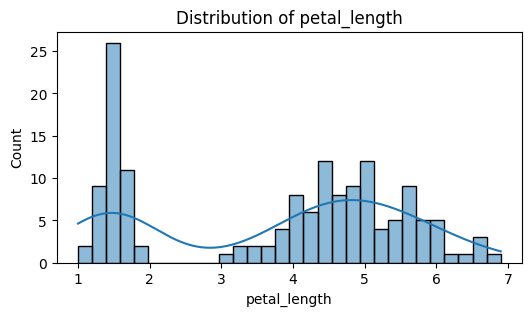

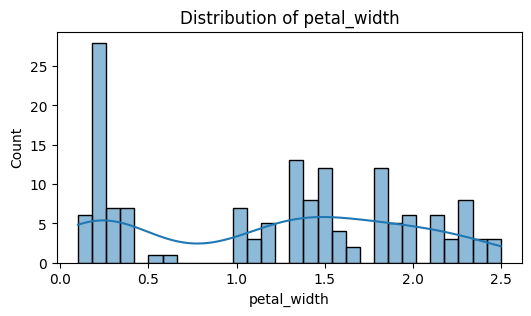

In [15]:
for col in numeric_cols :
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

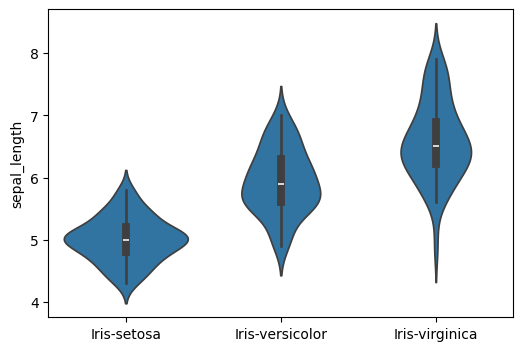

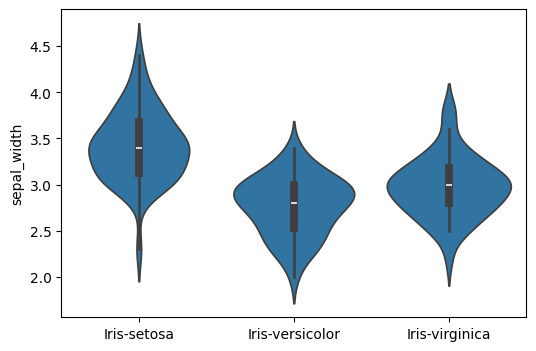

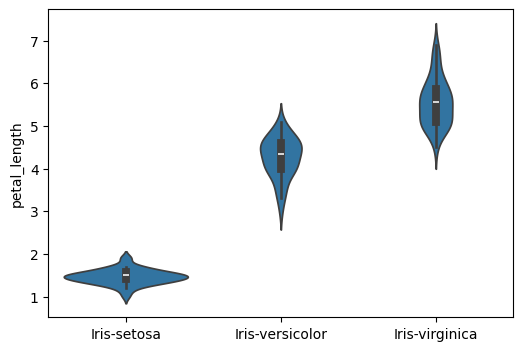

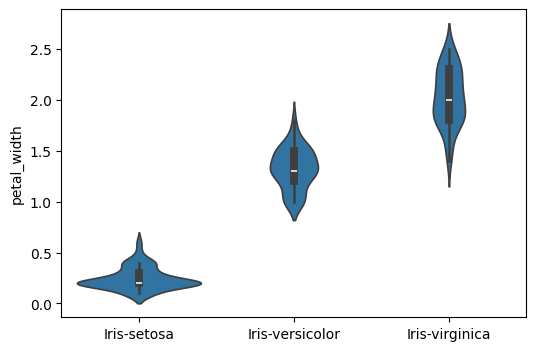

In [25]:
for col in numeric_cols :
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='species', y=col, data=df)
    plt.xlabel('')
    plt.show()

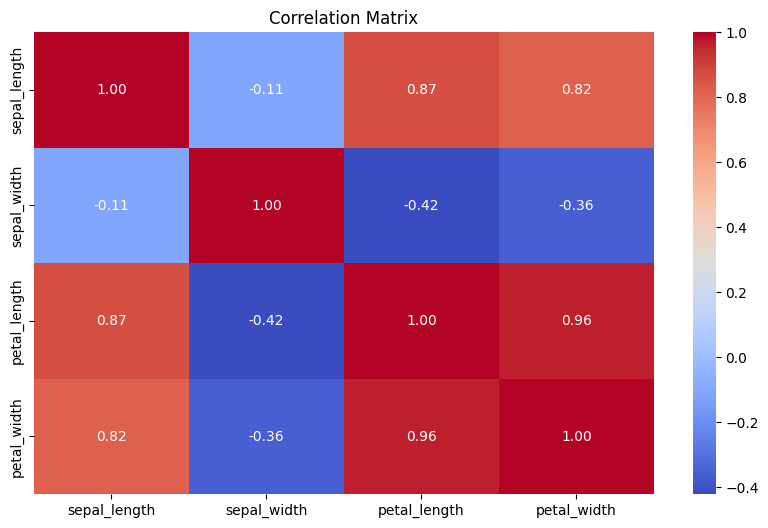

In [26]:
#correlation between numeric features
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [33]:
x = df[numeric_cols]
x.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [34]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [38]:
X = df.drop(columns=['species'])
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [41]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

#Accuracy
metrics.accuracy_score(prediction, y_test)

0.9

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_mat = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

confusion_mat

array([[10,  0,  0],
       [ 0,  7,  3],
       [ 0,  0, 10]])

In [47]:
print(classification_rep)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.70      0.82        10
 Iris-virginica       0.77      1.00      0.87        10

       accuracy                           0.90        30
      macro avg       0.92      0.90      0.90        30
   weighted avg       0.92      0.90      0.90        30

